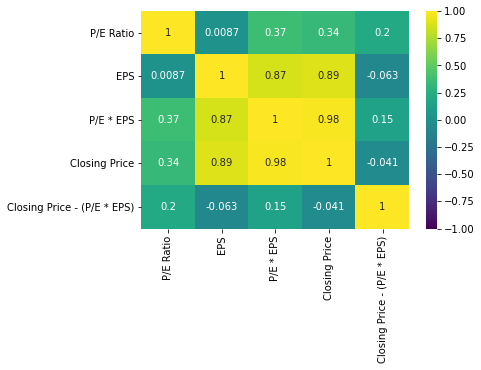

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Heatmap

df = pd.read_csv("SP500_PE-EPS_and_Closing.csv")

df = df.drop(["Date"], axis=1)

heatmap = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='viridis')

plt.show()

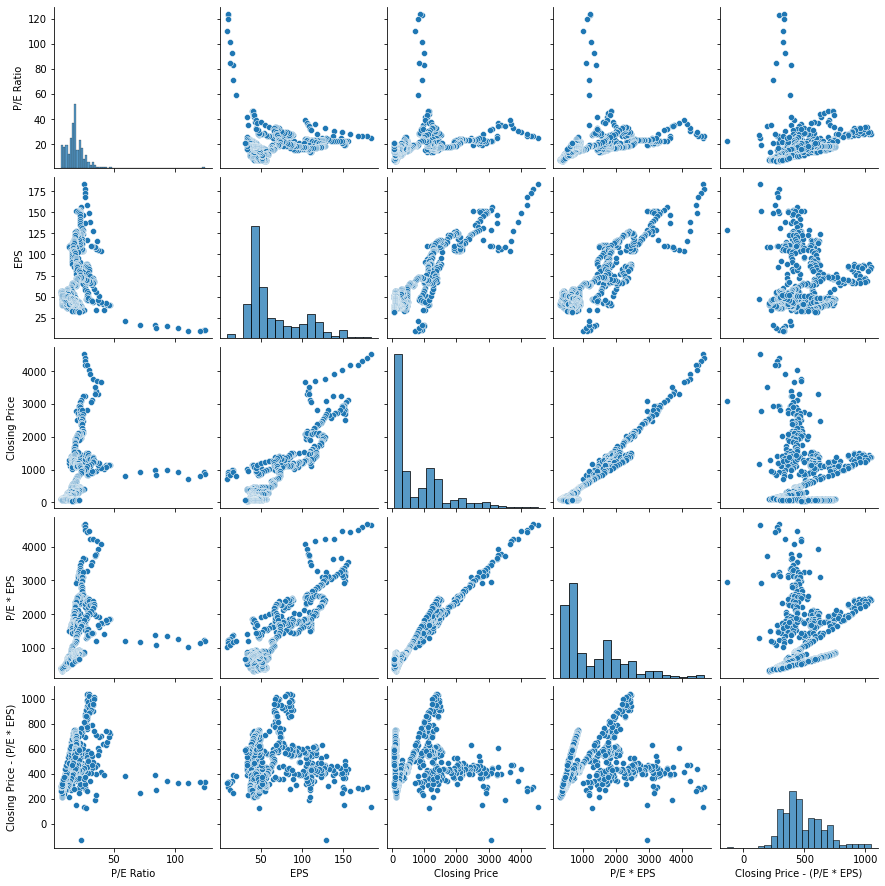

In [2]:
#Pairplot

sns.pairplot(df, vars=["P/E Ratio", "EPS", "Closing Price", "P/E * EPS", "Closing Price - (P/E * EPS)"])
plt.show()

Training R2 for Linear Regression: 0.961797336138442
Training MSE for Linear Regression: 29449.68072596113


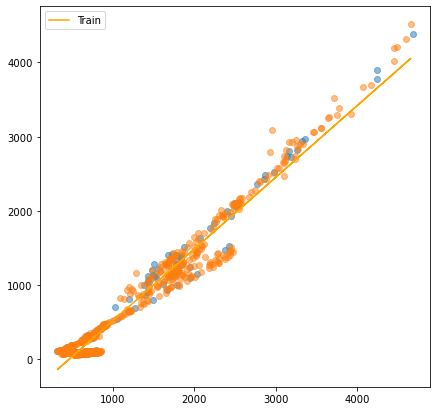

In [5]:
#Linear Regression 'P/E * EPS' and 'Closing Price'

import operator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Split the data into test and train for horsepower and mpg
train, test = train_test_split(df, test_size=.2, random_state=25)
x_train, x_test = train['P/E * EPS'], test['P/E * EPS']
y_train, y_test = train['Closing Price'], test['Closing Price']

#Reshapes into 1D array
x_train = np.array(x_train).reshape((-1,1))
y_train = np.array(y_train).reshape((-1,1))
x_test = np.array(x_test).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))

reg_train = LinearRegression().fit(x_train, y_train)
y_pred_train = reg_train.predict(x_train)
train_mse = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print('Training R2 for Linear Regression: %8.15f' % r2_train)
print("Training MSE for Linear Regression:", train_mse)

plt.figure(figsize = (7, 7))

#Test scatterplot; blue
plt.scatter(x=x_test, y=y_test, alpha=.5)

#Training scatterplot; orange
plt.scatter(x=x_train, y=y_train, alpha=.5)

#Plot the train line
plt.plot(x_train, y_pred_train, color='orange', label="Train")

plt.legend(loc="upper left")

plt.show() 




Train MSE: 23980.467825789881317
Train R2 For Polynomial Regression: 0.969573443800192


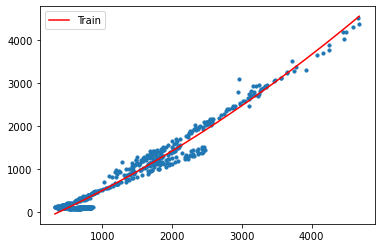

In [6]:
#Polynomial Regression degree = 2 on 'P/E * EPS' and 'Closing Price'

import operator

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = df.loc[:,'P/E * EPS']
y = df.loc[:,'Closing Price']

x = np.array(x).reshape((-1,1))
y = np.array(y).reshape((-1,1))

#Generate new feature matrix of all polynomial combinations with degree
#less than or equal to 2
x_poly =  PolynomialFeatures(degree=2).fit_transform(x)

#Get the train and test sets
x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

#Get the predicted outputs of train and test sets
model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

#Get the training MSE
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print('\nTrain MSE: %8.15f' % mse_train)
print('Train R2 For Polynomial Regression: %8.15f' % r2_train)

#Plot the Line and scatter
plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='r', label="Train")

plt.legend(loc="upper left")

plt.show()
